### Chiller Data Analysis

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data into a df
df = pd.read_csv('HVAC_energy_data.csv', index_col="Local Time (Timezone : GMT+8h)",parse_dates=True)
df.sort_index(inplace=True)
pd.set_option('display.max_columns', None)

In [4]:
#inspecting the data
df.head()

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
Local Time (Timezone : GMT+8h),,,,,,,,,
2019-08-18 00:00:00,85.6,31.4,479.6,116.2,82,75,79,13,29.83
2019-08-18 00:30:00,84.3,31.1,460.3,114.5,82,75,79,12,29.83
2019-08-18 01:00:00,84.6,31.3,462.4,116.8,82,75,79,12,29.83
2019-08-18 01:30:00,84.8,31.4,458.5,117.0,82,75,79,12,29.83
2019-08-18 02:00:00,84.7,31.4,455.4,117.0,82,75,79,12,29.83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13615 entries, 2019-08-18 00:00:00 to 2020-06-01 13:00:00
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Chilled Water Rate (L/sec)        13615 non-null  float64
 1   Cooling Water Temperature (C)     13615 non-null  float64
 2   Building Load (RT)                13615 non-null  float64
 3   Chiller Energy Consumption (kWh)  13615 non-null  float64
 4   Outside Temperature (F)           13615 non-null  int64  
 5   Dew Point (F)                     13615 non-null  int64  
 6   Humidity (%)                      13615 non-null  int64  
 7   Wind Speed (mph)                  13615 non-null  int64  
 8   Pressure (in)                     13615 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.0 MB


In [6]:
#check for missing values
df.isnull().sum()

Chilled Water Rate (L/sec)          0
Cooling Water Temperature (C)       0
Building Load (RT)                  0
Chiller Energy Consumption (kWh)    0
Outside Temperature (F)             0
Dew Point (F)                       0
Humidity (%)                        0
Wind Speed (mph)                    0
Pressure (in)                       0
dtype: int64

In [7]:
#renaming columns
df.rename(columns={'Local Time (Timezone : GMT+8h)': 'time', 'Chilled Water Rate (L/sec)':'chilled_water_rate',
                  'Cooling Water Temperature (C)':'cooling_water_temp', 'Building Load (RT)':'bldg_load',
                  'Chiller Energy Consumption (kWh)':'chiller_energy_consumption',
                   'Outside Temperature (F)':'outside_temp', 'Dew Point (F)':'dew_point',
                   'Humidity (%)': 'humidity', 'Wind Speed (mph)': 'wind_speed', 'Pressure (in)': 'pressure'},
         inplace=True)

In [8]:
df.head()

,chilled_water_rate,cooling_water_temp,bldg_load,chiller_energy_consumption,outside_temp,dew_point,humidity,wind_speed,pressure
Local Time (Timezone : GMT+8h),,,,,,,,,
2019-08-18 00:00:00,85.6,31.4,479.6,116.2,82,75,79,13,29.83
2019-08-18 00:30:00,84.3,31.1,460.3,114.5,82,75,79,12,29.83
2019-08-18 01:00:00,84.6,31.3,462.4,116.8,82,75,79,12,29.83
2019-08-18 01:30:00,84.8,31.4,458.5,117.0,82,75,79,12,29.83
2019-08-18 02:00:00,84.7,31.4,455.4,117.0,82,75,79,12,29.83


In [9]:
#converting the time column into a datetime data type
#df['time'] = pd.to_datetime(df['time'])

In [10]:
df = df.resample('H').sum()

In [11]:
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour

In [12]:
df.columns

Index(['chilled_water_rate', 'cooling_water_temp', 'bldg_load',
       'chiller_energy_consumption', 'outside_temp', 'dew_point', 'humidity',
       'wind_speed', 'pressure', 'month', 'day', 'hour'],
      dtype='object')

array([<AxesSubplot:title={'center':'pressure'}>], dtype=object)

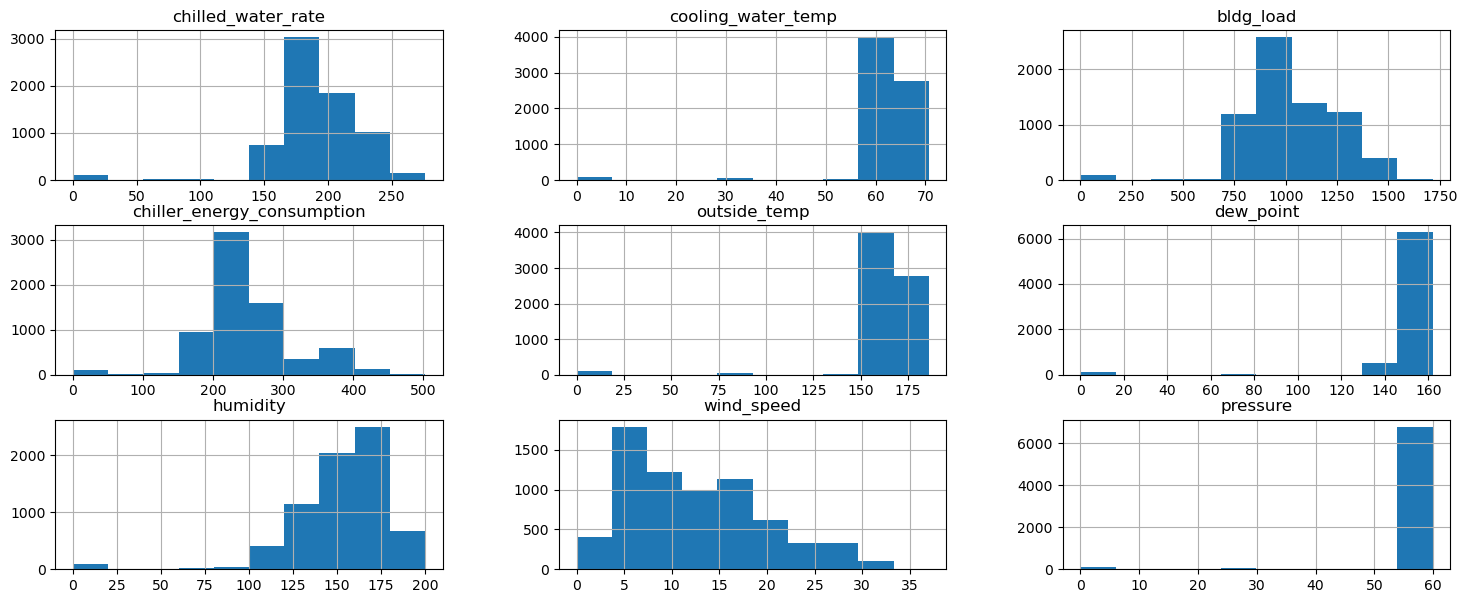

In [13]:
#creating a histogram for the numeric features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,7))
df.hist(column='chilled_water_rate', ax=axes[0,0])
df.hist(column='cooling_water_temp', ax=axes[0,1])
df.hist(column='bldg_load', ax=axes[0,2])
df.hist(column='chiller_energy_consumption', ax=axes[1,0])
df.hist(column='outside_temp', ax=axes[1,1])
df.hist(column='dew_point', ax=axes[1,2])
df.hist(column='humidity', ax=axes[2,0])
df.hist(column='wind_speed', ax=axes[2,1])
df.hist(column='pressure', ax=axes[2,2])

In [14]:
#checking for the stats of the numeric features
df.describe()

,chilled_water_rate,cooling_water_temp,bldg_load,chiller_energy_consumption,outside_temp,dew_point,humidity,wind_speed,pressure,month,day,hour
count,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000,6926.000000
mean,190.171080,62.162475,1024.054837,249.283858,163.364280,147.415680,153.028732,12.397776,58.596395,6.426220,16.125614,11.489893
std,33.986404,8.177019,226.543539,65.808170,21.843143,18.828944,28.811553,7.354903,7.349160,3.862432,8.848118,6.921705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,173.700000,61.500000,882.225000,210.200000,162.000000,146.000000,140.000000,6.000000,59.540000,3.000000,8.000000,5.000000
50%,188.500000,63.000000,988.000000,236.000000,164.000000,150.000000,158.000000,12.000000,59.600000,5.000000,16.000000,11.000000
75%,210.500000,64.900000,1187.525000,277.000000,172.000000,152.000000,173.000000,17.000000,59.690000,10.000000,24.000000,17.000000
max,276.200000,70.700000,1715.300000,502.400000,186.000000,162.000000,200.000000,37.000000,59.900000,12.000000,31.000000,23.000000


<AxesSubplot:>

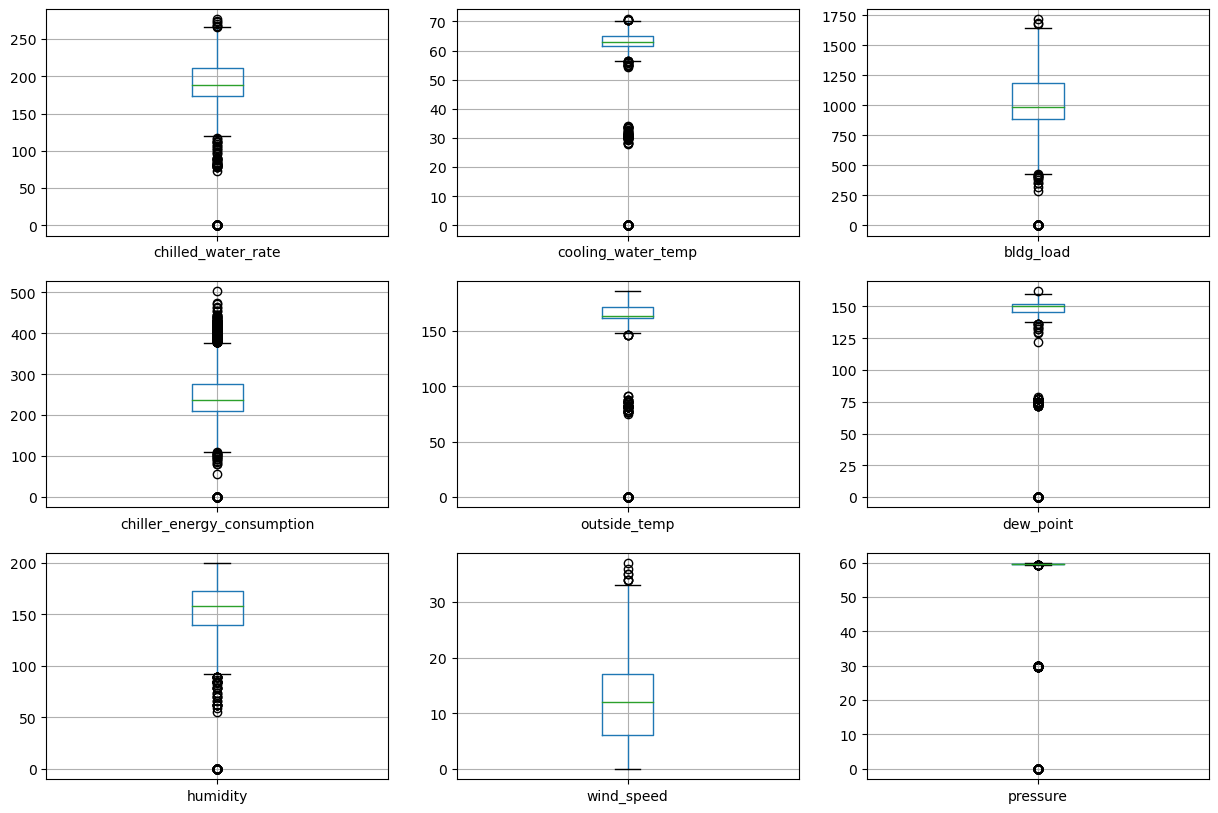

In [15]:
#creating a boxplot to check for possible outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
df.boxplot(column='chilled_water_rate', ax=axes[0,0])
df.boxplot(column='cooling_water_temp', ax=axes[0,1])
df.boxplot(column='bldg_load', ax=axes[0,2])
df.boxplot(column='chiller_energy_consumption', ax=axes[1,0])
df.boxplot(column='outside_temp', ax=axes[1,1])
df.boxplot(column='dew_point', ax=axes[1,2])
df.boxplot(column='humidity', ax=axes[2,0])
df.boxplot(column='wind_speed', ax=axes[2,1])
df.boxplot(column='pressure', ax=axes[2,2])

In [16]:
#Looking at the data summary and the boxplots, it seems to appear that there are a lot of data points that can be
#considered outliers; however, the chiller rate and energy consumption are dependent on the other variables on this
#dataset. The other variables such as outside temp, dew point, humidity, wind speed and pressure are all external
#environmental factors which vary. This is the most probable contributing factor to the wide range of data as 
#shown in the plot. 

<AxesSubplot:>

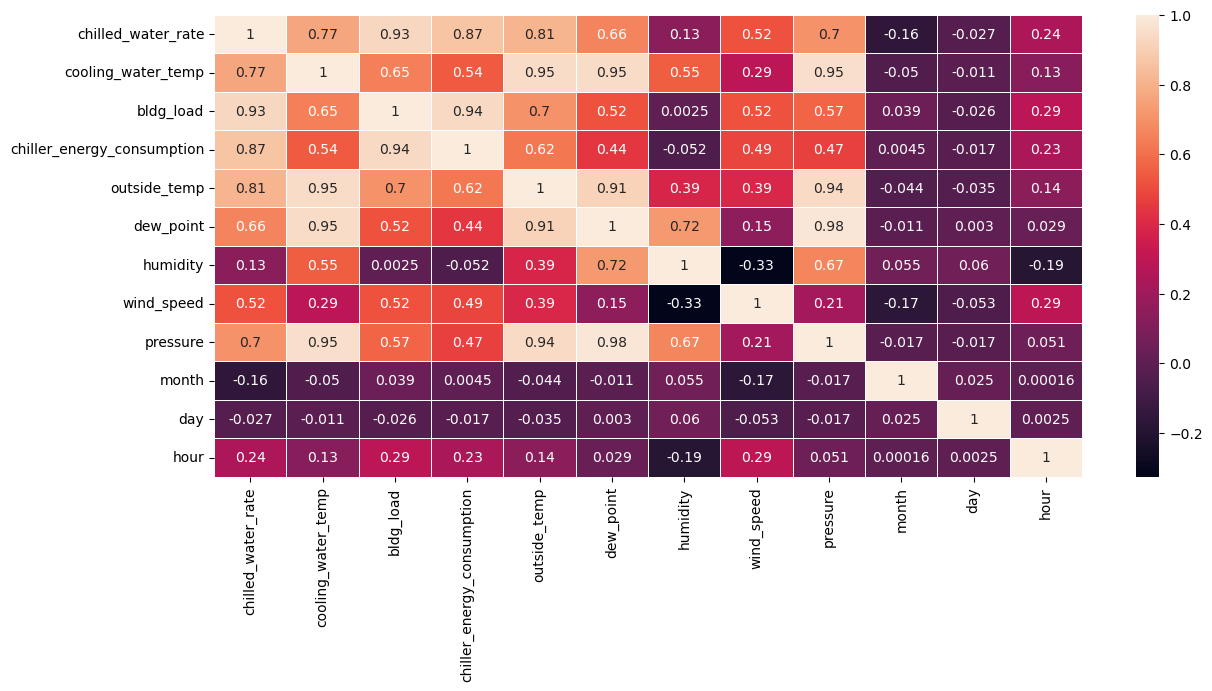

In [17]:
#plotting to check for correlation between the variables
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), linewidth=0.6, annot=True)

In [18]:
#setting the target variable
y = df['chilled_water_rate']

In [19]:
#generating the 
X = df.drop(['chilled_water_rate', 'chiller_energy_consumption', 'humidity', 'month',
            'day', 'hour'], axis=1)

In [20]:
#chiller_energy_consumption is dropped as this depends on the flow rate which we are trying to predict
#all other variables dropped due to low correlation with our target

In [21]:
#splitting the training set and the test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#defining the model performance evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def error_metrics(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print("RMSE", rmse)
    print("MAE", mean_absolute_error(actual, predicted))

In [23]:
#generating the RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)

rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [24]:
y_preds = rfr.predict(X_test)
error_metrics(y_test, y_preds)

RMSE 8.615290303591138
MAE 6.3269603174603235


In [25]:
#generating the XGBRegressor model
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=500, random_state=1)
xgb.fit(X_train, y_train,
       eval_set=[(X_test, y_test)],
       early_stopping_rounds=100,
       verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [26]:
y_preds = xgb.predict(X_test)
error_metrics(y_test, y_preds)

RMSE 8.74671483881475
MAE 6.47766674893759
